# **Graduate Rotational Internship Program (GRIP)**
**The Sparks foundation Data Science & Business Analytics Tasks** 
- **Task : Exploratory Data Analysis - Sports (Level - Advanced)**
- **Author : Meghana.Ch**
- **Tool : Python**
- **IDE : Google colab**
- **Dataset** - https://bit.ly/34SRn3b 

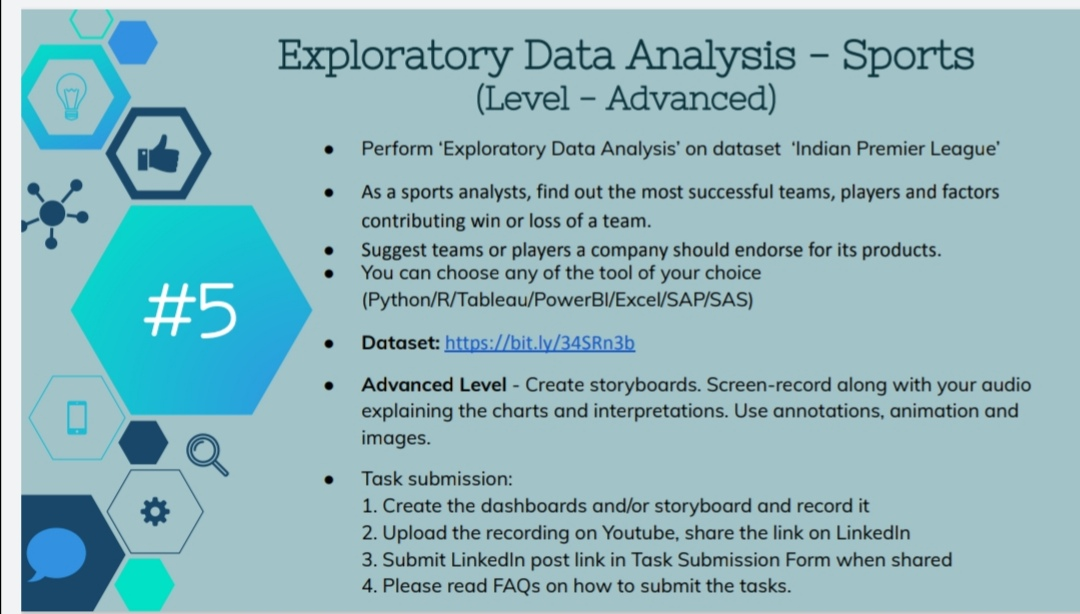

**Exploratory Data Analysis - Sports**

*Problem Statement: Perform Exploratory Data Analysis on 'Indian Premiere League*'

*As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.*

*Suggest teams or players a company should endorse for its products.*







**Importing LIBRARIES:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading 1st Dataset**

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 4.4MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-cp37-none-any.whl size=31648 sha256=8b3279912864a41627ae22883aaa32469c18fac7fda15dbaa0c60ca0c80f8d8a
  Stored in directory: /root/.cache/pip/wheels/3b/5c/fa/92ee330d259e8fa5bedbd53f67040710fe81cfa463b8711d26
Successfully built libarchive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Step 1: Select a dataset

***Loading 1st matches.csv Dataset***

In [ ]:
matches = pd.read_csv('/content/gdrive/MyDrive/Intern/matches.csv')

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Loading 2nd deliveries.csv Dataset**

In [ ]:
deliveries = pd.read_csv('/content/gdrive/MyDrive/Intern/deliveries.csv')

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## Step 2: Perform data preparation & cleaning
Load the dataset into a data frame using Pandas

Explore the number of rows & columns, ranges of values etc.

Handle missing, incorrect and invalid data

Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [ ]:
matches.shape

(756, 18)

**Size of Deliveries Dataset**

In [ ]:
deliveries.shape

(179078, 21)

In [ ]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**Pandas dataframe.info() function is used to get a concise summary of the dataframe**

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

**Now,will merge the two datasets matches,deliveries to get better insights from the data**

In [ ]:
#merging the 2 datasets
merge_data = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
merge_data.shape

(179078, 39)

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
merge_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
matches.id.is_unique

True

In [ ]:
matches.id.nunique()

756

**Note** : *id is unique so we can set this as our index*

In [ ]:
matches.set_index('id', inplace=True)

Describe by default only numeric fields are returned, but i want statistical details including with other data types

In [ ]:
#Summary statistics of matches data

matches.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2011-05-01,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,C Shamshuddin
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.isna().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
matches[['team1','team2']].nunique()

team1    15
team2    15
dtype: int64

In [ ]:
percent = matches.isnull().sum() / matches.shape[0] * 100.00
print(round(percent,2))

season              0.00
city                0.93
date                0.00
team1               0.00
team2               0.00
toss_winner         0.00
toss_decision       0.00
result              0.00
dl_applied          0.00
winner              0.53
win_by_runs         0.00
win_by_wickets      0.00
player_of_match     0.53
venue               0.00
umpire1             0.26
umpire2             0.26
umpire3            84.26
dtype: float64


In [ ]:
matches[['city','venue']].nunique()

city     32
venue    41
dtype: int64

**From Pre profiling, we found that:**

- city has missing values

- umpire1 and umpire2 have 2 missing value in each

- umpire3 has 84% missing values

- city has 32 distinct values while venue has 41 distinct values 

**Filling the missing values of city column**

*First let's find the venues corresponding to which the values of city are empty*

In [ ]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


***So, missing values can be filled with Dubai***

In [ ]:
matches_city = matches.city.fillna('Dubai')

*umpire1 and umpire2 columns have one missing value each.*

In [ ]:
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


Umpire3 column has close to 84% missing values. So im using fillna to replace the missing values

In [ ]:
# If we want we can drop the column but my motto is not to drop any data

matches['umpire3'].fillna(matches['umpire3'].mode(),inplace=True)

**city has 32 unique values & venues has 41 values.**

**Let's find out venues grouped by cities to see which cities have number of seasons**


In [ ]:

city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

**Observations:**

- Bengaluru and Bangalore both are in the data, they are same. So we need to keep one of them
- Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium
- Mumbai has 3 stadiums/venues used for IPL
- Pune has 2 venues for IPL
### Visual representation of number of venues in each city .

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

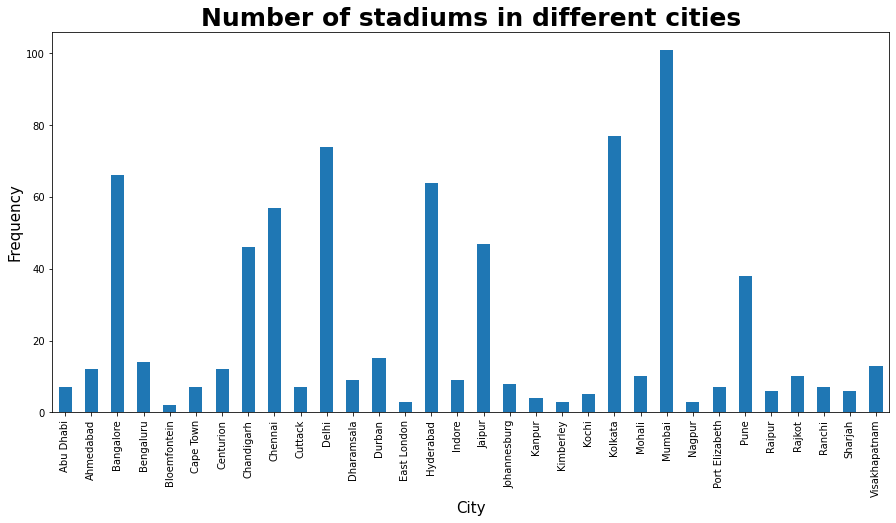

In [ ]:
#Plotting venues with cities 
v = pd.crosstab(matches['city'],matches['venue'])
 
#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (15,7))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

**Exploratory Analysis and Visualization:**

TODO - write some explanation here.

Compute the mean, sum, range and other interesting statistics for numeric columns

Explore distributions of numeric columns using histograms etc.

Explore relationship between columns using scatter plots, bar charts etc.

Make a note of interesting insights from the exploratory analysis

**Pandas describe() is used to view some basic statistical details like percentile, mean, std etc**

In [ ]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


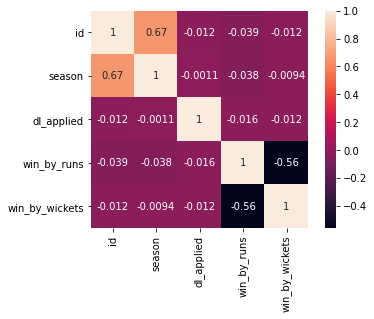

In [ ]:
corr = matches.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

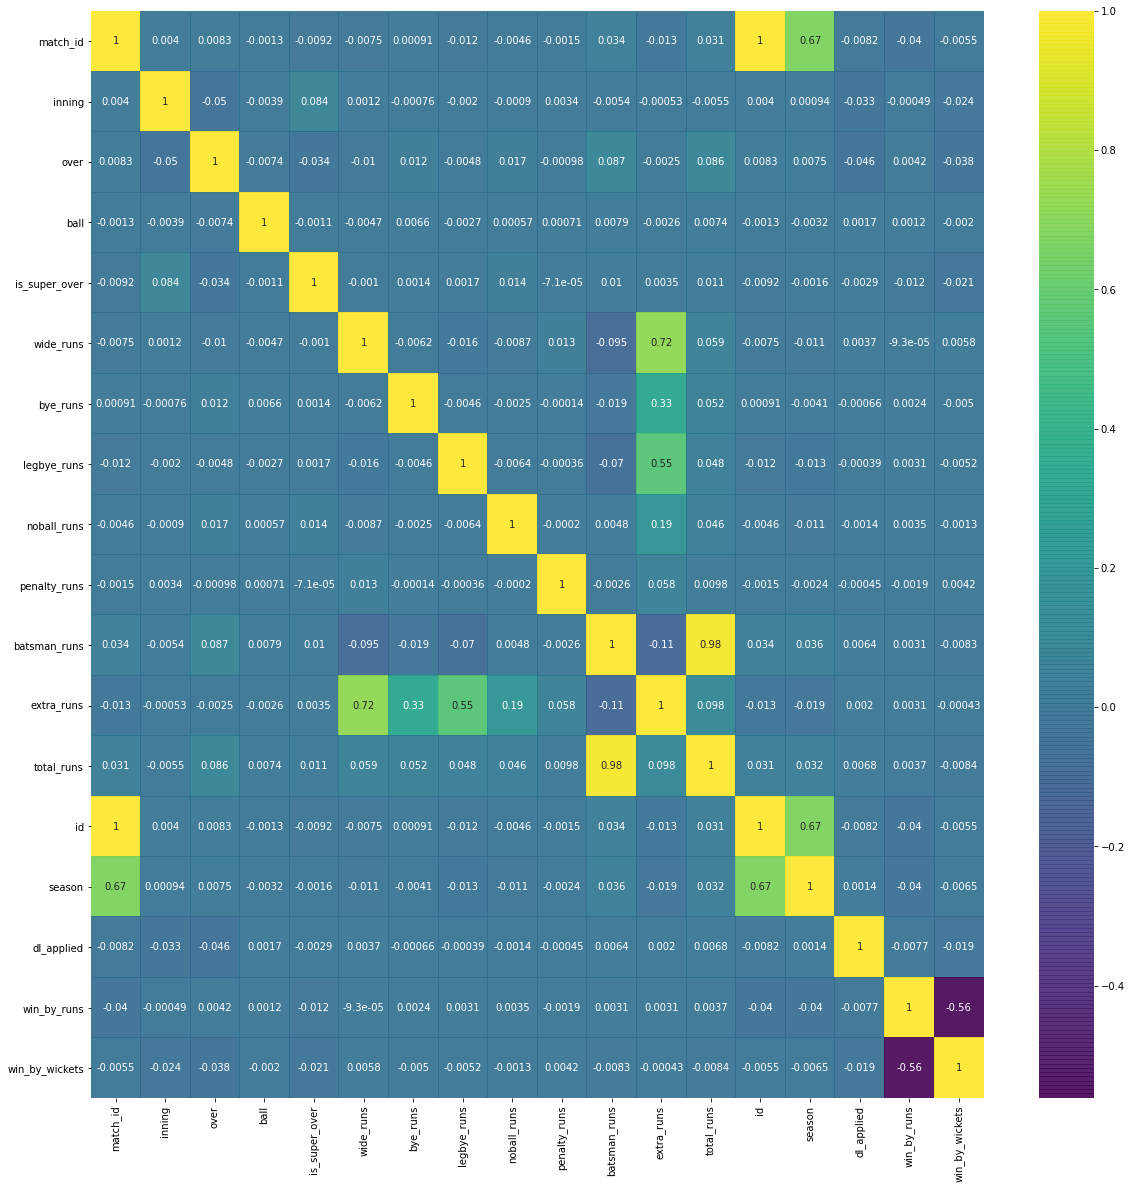

In [ ]:
corrmat = merge_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_data[top_corr_features].corr(),annot=True,cmap=plt.cm.viridis, alpha=.9)

In [ ]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


**Total number of runs by bat,field in toss_decision**

In [ ]:
matches_RB = matches.groupby('toss_decision')['win_by_runs'].sum()
matches_RB

toss_decision
bat      3742
field    6300
Name: win_by_runs, dtype: int64

**Number of wickets taken by a toss_decision**

In [ ]:
pd.crosstab(matches["toss_decision"],matches["win_by_wickets"])

win_by_wickets,0,1,2,3,4,5,6,7,8,9,10
toss_decision,,,,,,,,,,,
bat,140,1,1,4,11,36,27,32,21,18,2
field,210,2,5,14,30,35,58,48,33,19,9


In [ ]:
matches[["toss_decision","win_by_wickets"]].sort_values("win_by_wickets",ascending=False).value_counts()

toss_decision  win_by_wickets
field          0                 210
bat            0                 140
field          6                  58
               7                  48
bat            5                  36
field          5                  35
               8                  33
bat            7                  32
field          4                  30
bat            6                  27
               8                  21
field          9                  19
bat            9                  18
field          3                  14
bat            4                  11
field          10                  9
               2                   5
bat            3                   4
field          1                   2
bat            10                  2
               2                   1
               1                   1
dtype: int64

**Average runs per ball in each season**

In [ ]:
merge_data[['win_by_runs','ball']].mean(),merge_data['season']

(win_by_runs    13.404036
 ball            3.615587
 dtype: float64, 0         2017
 1         2017
 2         2017
 3         2017
 4         2017
           ... 
 179073    2019
 179074    2019
 179075    2019
 179076    2019
 179077    2019
 Name: season, Length: 179078, dtype: int64)

**Total runs scored by teams in each season**

In [ ]:
matches.groupby('season')['win_by_runs'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: win_by_runs, dtype: int64

**Number of overs given by a bowler**

In [ ]:
deliveries['over'].sum(),deliveries['bowler'].value_counts()

(1819878, Harbhajan Singh    3451
 A Mishra           3172
 PP Chawla          3157
 R Ashwin           3016
 SL Malinga         2974
                    ... 
 L Livingstone         6
 RA Tripathi           6
 SN Khan               2
 SPD Smith             2
 AC Gilchrist          1
 Name: bowler, Length: 405, dtype: int64)

**Highest and Lowest Run rate**

In [ ]:
min_max = matches['win_by_runs']
print(min_max.min(),min_max.max())

0 146


**Highest and Lowest Run by a Batsman**

In [ ]:
high_low = merge_data[['win_by_runs','batsman']]
print(high_low.min(),high_low.max())

win_by_runs                 0
batsman        A Ashish Reddy
dtype: object win_by_runs       146
batsman        Z Khan
dtype: object


**Analyze the team with the most wins in each season**

In [ ]:
teams_per_season = matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

Number of overs given by a bowler

In [ ]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


- The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


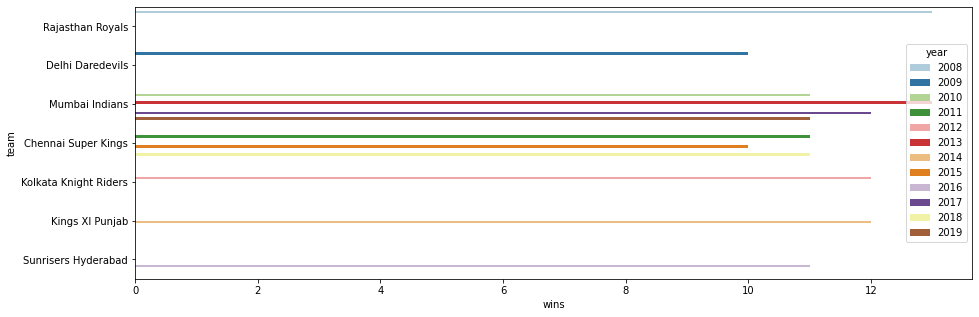

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

- From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).
- its clearly visible that the team Rajasthan Royals & Mumbai Indians	mostly won.



***Number of matches played in each season***

In [ ]:
matches['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

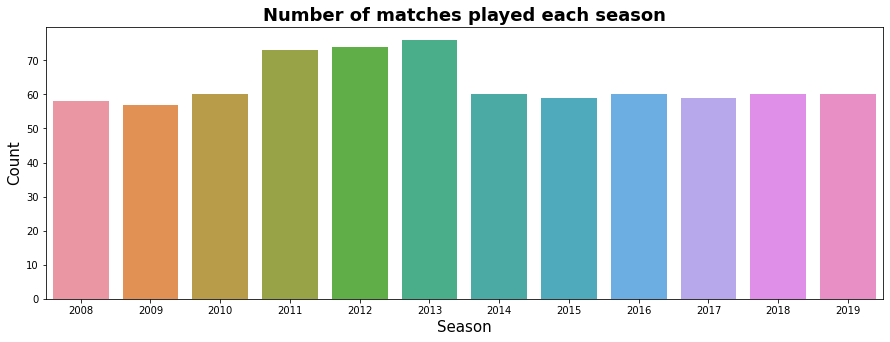

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

- *2011-2013 have more matches being played than other seasons*
- 2013 is most highest season which has conducted the 76 matches.
- in 2012 is second highest season(74 matches) and it is the highest season comparing with other seasons. 
- 2011 has conducted 73 matches,remaining all seasons has approximately 58 to 60 matches

**How many teams played in each season?**

In [ ]:
df = pd.DataFrame(matches, columns= ['team1','team2'])

print(df)


                           team1                        team2
0            Sunrisers Hyderabad  Royal Challengers Bangalore
1                 Mumbai Indians       Rising Pune Supergiant
2                  Gujarat Lions        Kolkata Knight Riders
3         Rising Pune Supergiant              Kings XI Punjab
4    Royal Challengers Bangalore             Delhi Daredevils
..                           ...                          ...
751        Kolkata Knight Riders               Mumbai Indians
752          Chennai Super Kings               Mumbai Indians
753          Sunrisers Hyderabad               Delhi Capitals
754               Delhi Capitals          Chennai Super Kings
755               Mumbai Indians          Chennai Super Kings

[756 rows x 2 columns]


In [ ]:
matches.groupby('season'),df.value_counts()

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fcdc1153450>,
 team1                    team2                      
 Kings XI Punjab          Kolkata Knight Riders          17
 Rajasthan Royals         Kolkata Knight Riders          17
 Mumbai Indians           Chennai Super Kings            16
                          Delhi Daredevils               16
 Kolkata Knight Riders    Royal Challengers Bangalore    16
                                                         ..
 Rising Pune Supergiants  Kings XI Punjab                 1
                          Royal Challengers Bangalore     1
 Gujarat Lions            Royal Challengers Bangalore     1
                          Rising Pune Supergiant          1
 Kolkata Knight Riders    Rising Pune Supergiant          1
 Length: 139, dtype: int64)

**Number of teams participated in each season**

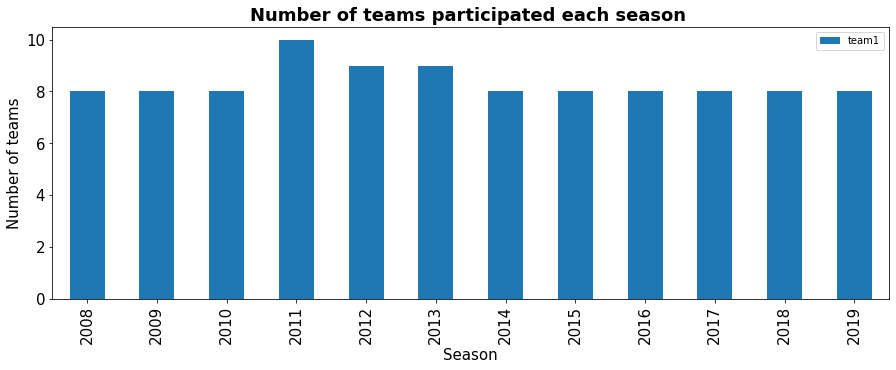

In [ ]:
matches.groupby('season')['team1'].nunique().plot(kind = "bar", figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Number of teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()

- *10 teams played in 2011 and 9 teams each in 2012 and 2013*

- 2011,2012,2013 conducted more Seasons comparing with other years. 

**which Venue has hosted most number of IPL matches**

In [ ]:
matches['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

Text(0.5, 0, 'Frequency')

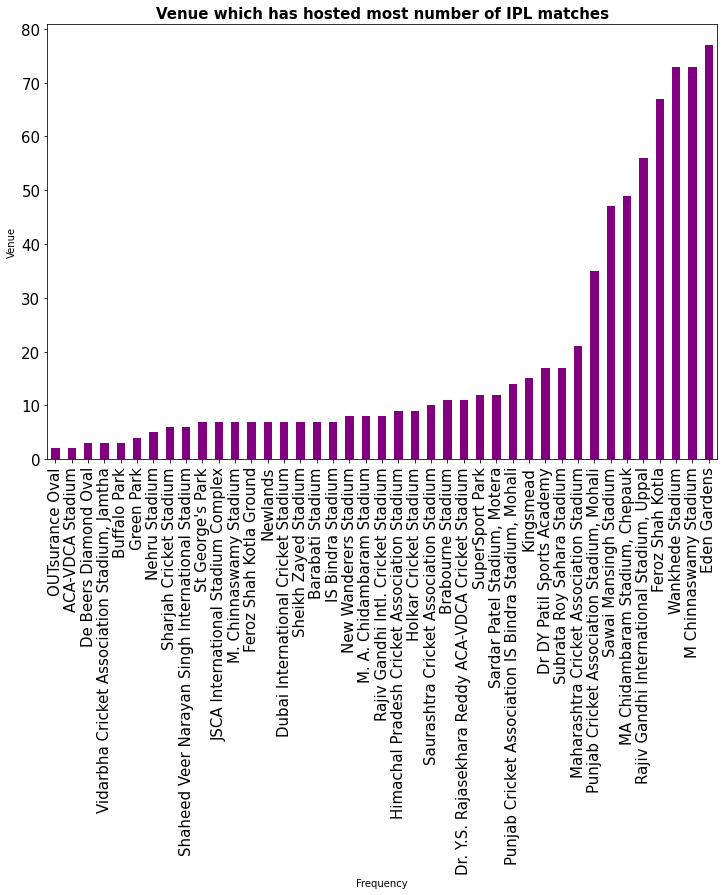

In [ ]:
matches.venue.value_counts().sort_values(ascending = True).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='purple')
plt.title("Venue which has hosted most number of IPL matches",fontsize=15,fontweight="bold")
plt.ylabel("Venue", size = 10)
plt.xlabel("Frequency", size = 10)

- Eden Gardens has hosted most number of IPL matches

**Does teams choosed the bat or field first, after toss winning?**

**TODO - Explore one or more columns by plotting a graph below, and add some explanation about it** 

In [ ]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

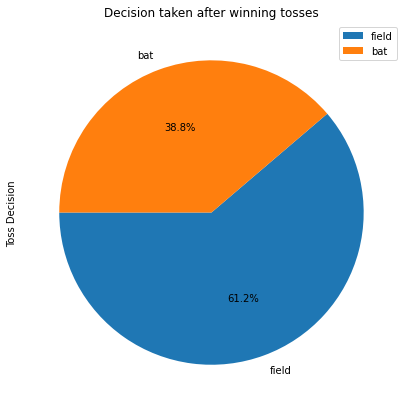

In [ ]:
matches['toss_decision'].value_counts().plot(kind='pie',autopct='%3.1f%%',figsize=(10,7),startangle=180,legend=True)
plt.ylabel("Toss Decision")
plt.title("Decision taken after winning tosses");

- As per Data record teams are more intrested in taking Field comparing with bats after winning the toss.

**How toss decision affects match results?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


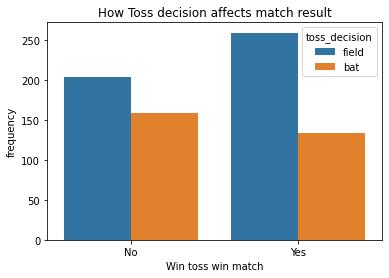

In [ ]:
matches['toss_win_game_win'] = np.where((matches.toss_winner==matches.winner),'Yes','No')
sns.countplot('toss_win_game_win',data=matches,hue='toss_decision')
plt.title("How Toss decision affects match result")
plt.xlabel("Win toss win match")
plt.ylabel("frequency");

- Mostly teams are winning as per toss result.

**Which team won the most number of toss.**

In [ ]:
toss_ser = matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


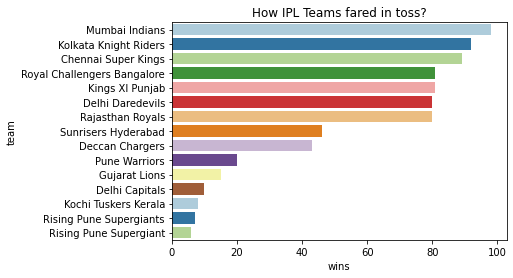

In [ ]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

 Mumbai Indians has won the most toss(till 2019) in IPL history.

All the top teams in IPL are successful in winning the toss as well.

**Which player's performance has played a major role to win?**

Text(0.5, 0, 'Players')

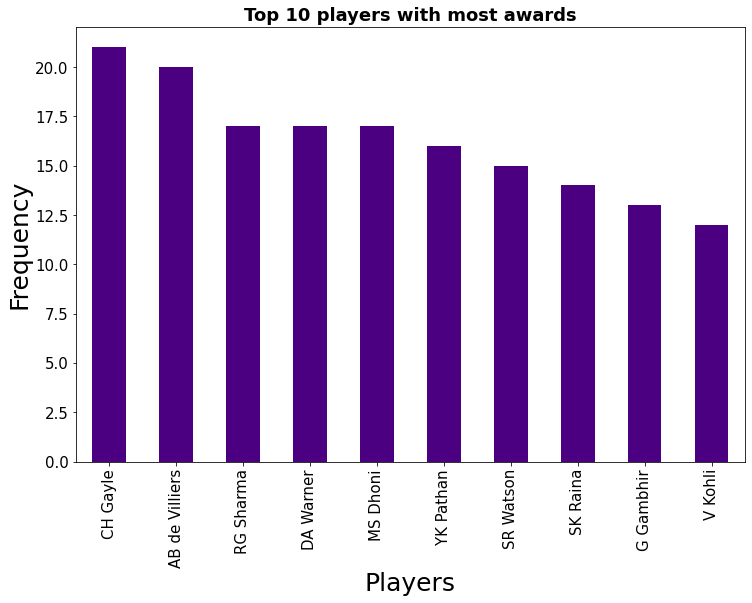

In [ ]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='Indigo')
plt.title("Top 10 players with most awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

- so far Chris Gayle had win many times comparing with others
- Also, all top 10 batsmen which kind of hints that in IPL batsmen have mostly dictated the matches

**Is batting second advantage over all years?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

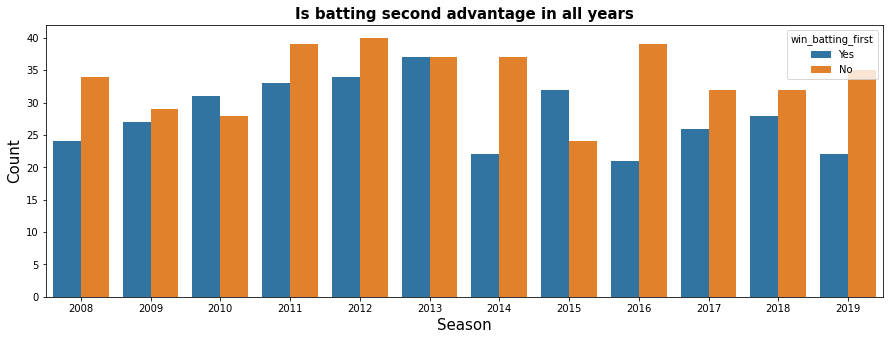

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantage in all years", fontsize=15,fontweight="bold")
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel("Season", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

- Except for 2010 and 2015, in all other seasons it can be seen that teams batting second have won more matches

**Teams total scoring runs, over the Season?**

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

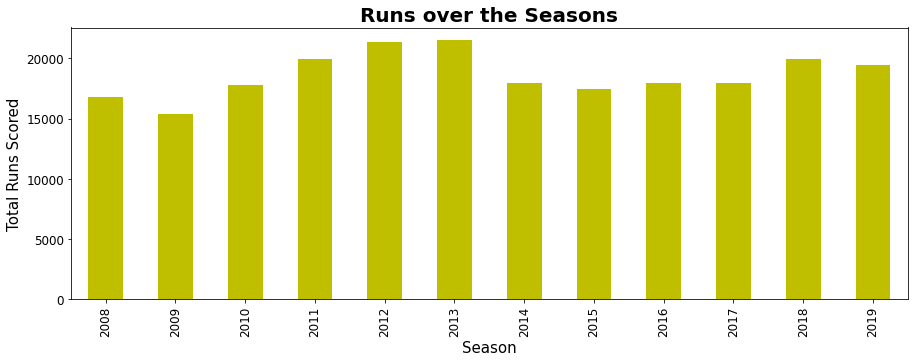

In [ ]:
merge_data.groupby('season')['batsman_runs'].sum().plot(kind = "bar", linewidth = 3, figsize =(15,5),
                                                                                             color = 'y')
plt.title("Runs over the Seasons",fontsize= 20, fontweight = 'bold')
plt.xlabel("Season", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

2012,2013 seasons were scored high runs

**Top Runs in IPL.**

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

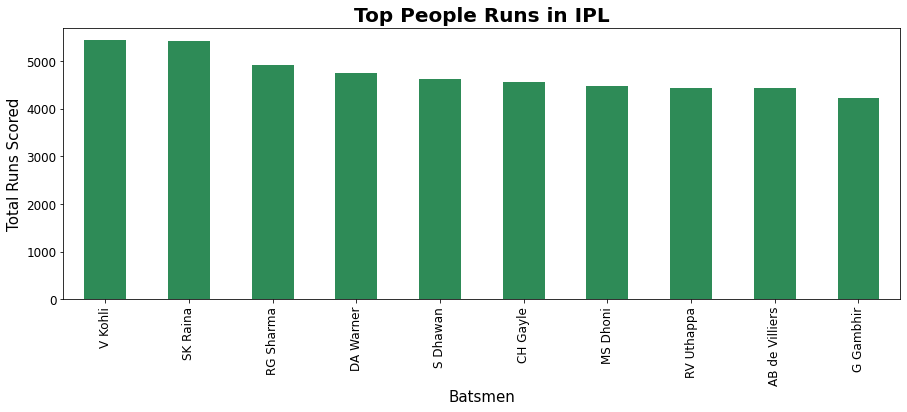

In [ ]:
#let's plot the top 10 runs so far in IPL
merge_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'seagreen',
                                                                                            figsize = (15,5))
plt.title("Top People Runs in IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)


- SK Raina & v kohli have highest runs in IPL.

**Which batsman has been most consistent among top run players?**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

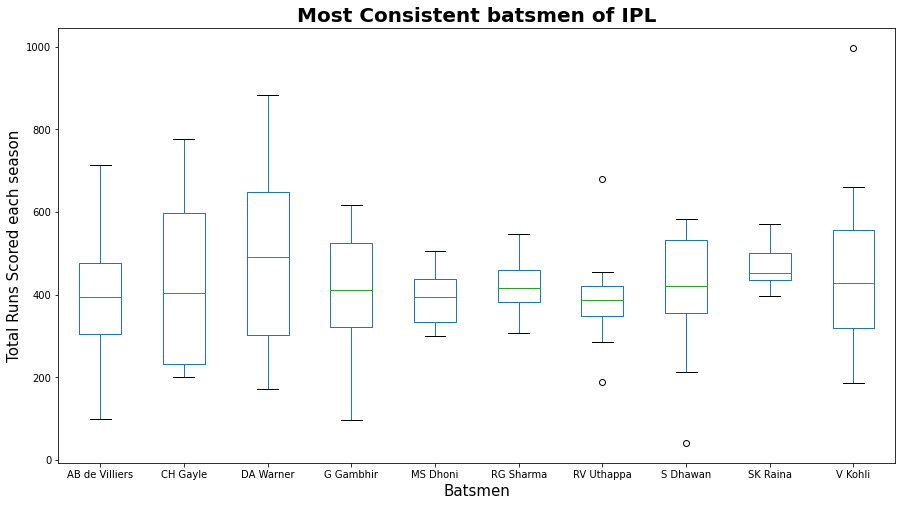

In [ ]:
consistent_batsman = merge_data[merge_data.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored each season", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

- Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 11 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

**Which bowlers has performed the best?**

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

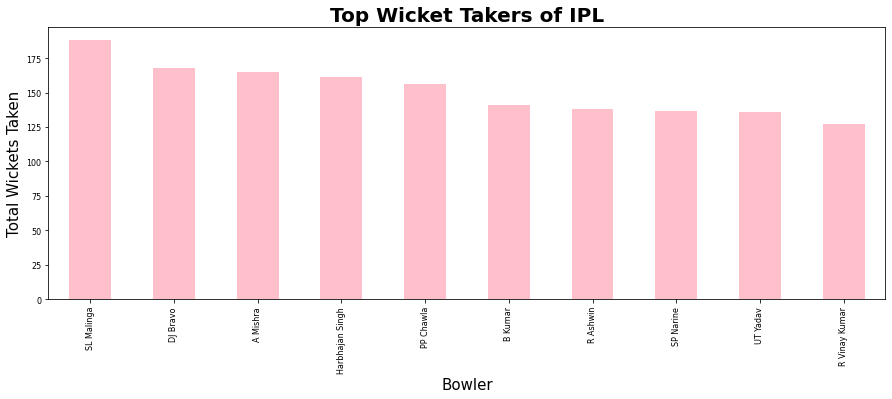

In [ ]:
merge_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'pink', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 15)
plt.ylabel("Total Wickets Taken", size = 15)
plt.xticks(size = 8)
plt.yticks(size = 8)

- Malinga has taken the most number of wickets in IPL & then Bravo and Amit Mishra
- In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners
- All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners
- All 5 pacers are right arm pacers

**Batsmen with the best strike rates over the years** 

In [ ]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(merge_data.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_data.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_data.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

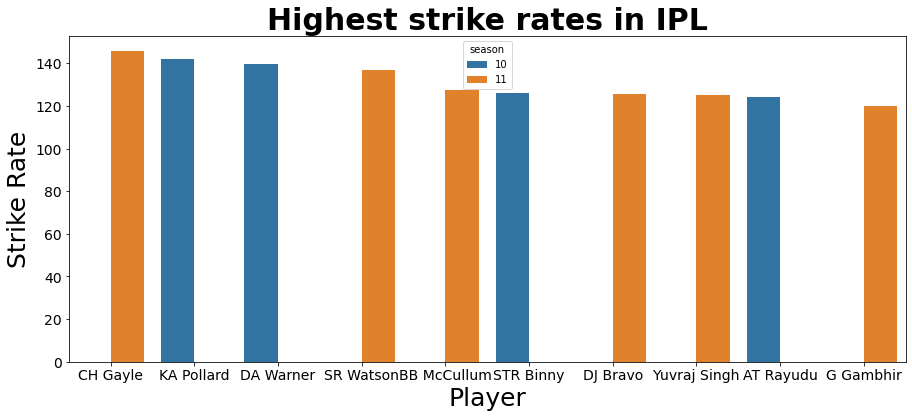

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

- In season 11 CH Gayle has the highest strike rates in IPL. 
- there is no much difference in between KA Pollard and CH Gayle

**Bowlers with maximum number of extra runs.**

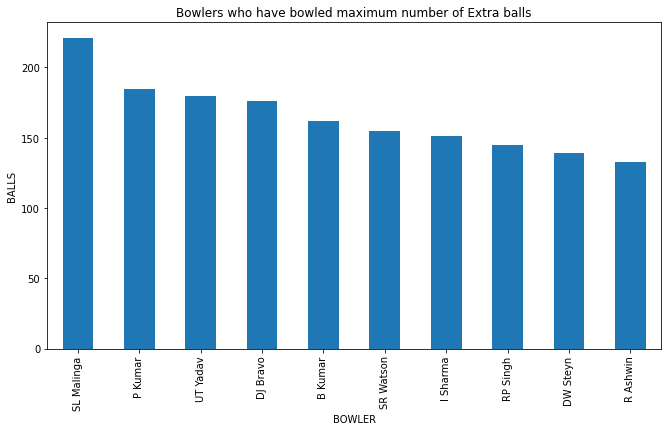

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [ ]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

**Which bowlers has picked up wickets most frequently?**

In [ ]:
balls_bowled=pd.DataFrame(merge_data.groupby('bowler')['ball'].count())
wickets_taken=pd.DataFrame(merge_data[merge_data['dismissal_kind']!='no_dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played=pd.DataFrame(merge_data.groupby('bowler')['season'].nunique())
bowler_sr=pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],'season':seasons_played['season']})
bowler_sr.reset_index(inplace=True)
bowler_sr['strike_rate']=bowler_sr['balls']/bowler_sr['wickets']
def cols(s):
    color='lightblue'
    return 'background-color: %s' % color
best_bowling_sr=bowler_sr[bowler_sr['wickets']>50].sort_values('strike_rate',ascending=True)
best_bowling_sr.head().style.applymap(cols,subset=pd.IndexSlice[:,['bowler','wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


**Inferences and Conclusion**
*Let’s summarize the important observations we made during Exploratory Data Analysis:*
- Mumbai Indians is the most successful team in IPL.
- Mumbai Indians has won the most number of toss.
- There were more matches won by chasing the total(419 matches) than defending(350 matches).
- When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
- The Mumbai city has hosted the most number of IPL matches.
- Chris Gayle has won the maximum number of player of the match title.
- Winning toss gives a slight edge(52% probability of winning) against the opponents.
- Five Indian players have figured in the top ten IPL players list.
- S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
- Eden Gardens has hosted the maximum number of IPL matches.
- Till 2019, 40 venues have hosted 756 IPL matches.